## Instalamos pandas y scikit-learn

In [1]:
!pip install pandas scikit-learn hdbscan matplotlib

You should consider upgrading via the '/home/nmercado/Code/otro/jupyter/bin/python3 -m pip install --upgrade pip' command.


## Importamos pandas y cargamos el csv con declaraciones juradas

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/nmercado1986/jupyter-notebooks/master/ddjj.csv')

## Un pequeño vistazo:

In [3]:
print(df.head())

    dj_id         cuit  anio  tipo_declaracion_jurada_id  \
0  400813  20120633725  2018                           1   
1  356086  20148014370  2018                           0   
2  378218  20148014370  2018                           1   
3  382121  20141495357  2018                           1   
4  267754  20077510088  2018                           2   

  tipo_declaracion_jurada_descripcion  rectificativa  \
0                               Anual              0   
1                             Inicial              0   
2                               Anual              0   
3                               Anual              0   
4                                Baja              0   

  funcionario_apellido_nombre   sector  \
0         ABA MARCELO ALFREDO  PUBLICO   
1     ABACA ALBERTO ALEJANDRO  PUBLICO   
2     ABACA ALBERTO ALEJANDRO  PUBLICO   
3      ABACA HECTOR ALEJANDRO  PUBLICO   
4        ABAD ALBERTO REMIGIO  PUBLICO   

                                           organi

## De esto solo nos interesan los nombres:

In [4]:
df = df[df.tipo_declaracion_jurada_id==1]
print(df['funcionario_apellido_nombre'])


0            ABA MARCELO ALFREDO
2        ABACA ALBERTO ALEJANDRO
3         ABACA HECTOR ALEJANDRO
5         ABAD BIBIANA GUADALUPE
6               ABAD JORGE ARIEL
                  ...           
57047           ZWEIFEL VERONICA
57048      ZWENGER PABLO RODRIGO
57049      ZWTZIG DEBORA BEATRIZ
57050         ZYGAL ROBERTO JUAN
57051    ZYLBERMAN PABLO RICARDO
Name: funcionario_apellido_nombre, Length: 44245, dtype: object


## Importamos los módulos de sklearn que vamos a usar:

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.base import clone


## Separamos los nombres en 3 features distintos de acuerdo al 1er, 2do y 3er token

Para no tener que estar lidiando con problemas de tipo por `None` en esos casos donde no hay tercer token (gente sin nombre del medio), lo reemplazamos con un token "--SIN NOMBRE--"

In [6]:
dftrain = pd.DataFrame()
dftrain['funcionario_apellido_nombre'] = df['funcionario_apellido_nombre'].apply(lambda s: s.lower())
dftrain['palabra0'] = dftrain['funcionario_apellido_nombre'].apply(lambda s: s.split(' ')[0])
dftrain['palabra1'] = dftrain['funcionario_apellido_nombre'].apply(lambda s: s.split(' ')[1])
dftrain['palabra2'] = dftrain['funcionario_apellido_nombre'].apply(lambda s: s.split(' ')[2] if len(s.split(' ')) > 2 else "--SIN NOMBRE--")

## Armamos un vocabulario con todos los nombres propios juntos. 

In [7]:
todosLosNombres = pd.concat([dftrain['palabra0'], dftrain['palabra1'], dftrain['palabra2']], ignore_index=True).dropna().unique()
todosLosNombres = list(map(lambda s: s.lower(), todosLosNombres))
print(todosLosNombres)

['aba', 'abaca', 'abad', 'abadia', 'abadie', 'abait', 'abal', 'aballay', 'abalo', 'abalos', 'abalsamo', 'aban', 'abances', 'abanillo', 'abarca', 'abaroa', 'abarza', 'abasolo', 'abate', 'abatedaga', 'abatemarco', 'abati', 'abaurre', 'abba', 'abbate', 'abbattista', 'abbenante', 'abbene', 'abbiate', 'abbondanza', 'abbondanzieri', 'abbruzzese', 'abdala', 'abdallah', 'abdelnur', 'abdenur', 'abdo', 'abdullatif', 'abedin', 'abeijon', 'abel', 'abeledo', 'abelenda', 'abelendo', 'abella', 'abelleyra', 'abelleyro', 'abello', 'abendaño', 'aberastain', 'aberasturi', 'abet', 'abiad', 'abihaggle', 'abiles', 'ablanedo', 'ablin', 'aboitiz', 'abolio', 'aboud', 'abraham', 'abrahamian', 'abramo', 'abramovich', 'abramovicz', 'abramowitz', 'abratte', 'abre', 'abrego', 'abregu', 'abriani', 'abrigo', 'abril', 'abrile', 'abritta', 'abud', 'abugauch', 'abuin', 'aburgeily', 'aburto', 'acacio', 'acampora', 'acasuso', 'accaristo', 'accattoli', 'accerboni', 'accetta', 'acciarri', 'accietto', 'accinelli', 'accinti',

## Por cada vocabulario, aplicamos tf-idf para calcular la frecuencia de cada nombre propio en cada una de las posiciones y en general en todo el listado de nombres

In [8]:
pipe = Pipeline([
    ('count', CountVectorizer(vocabulary=list(todosLosNombres))),
    ('idf', TfidfTransformer(norm=None, 
                             #sublinear_tf=True, 
                             smooth_idf=True)),
    #('scaler', MaxAbsScaler())
])
pipe0 = clone(pipe)
pipe1 = clone(pipe)
pipe2 = clone(pipe)
pipe.fit(dftrain['funcionario_apellido_nombre'])
pipe0.fit(dftrain['palabra0'])
pipe1.fit(dftrain['palabra1'])
pipe2.fit(dftrain['palabra2'])


#dftrain['tf_idf_palabra0_in0'] = (np.amax(pipe0.transform(dftrain['palabra0']).toarray(), axis=1))
#dftrain['tf_idf_palabra0_in1'] = (np.amax(pipe1.transform(dftrain['palabra0']).toarray(), axis=1))
#dftrain['tf_idf_palabra0_in2'] = (np.amax(pipe2.transform(dftrain['palabra0']).toarray(), axis=1))


dftrain['tf_idf_palabra1_in0'] = (np.amax(pipe0.transform(dftrain['palabra1']).toarray(), axis=1))
# dftrain['tf_idf_palabra1_in1'] = (np.amax(pipe1.transform(dftrain['palabra1']).toarray(), axis=1))
dftrain['tf_idf_palabra1_in2'] = (np.amax(pipe2.transform(dftrain['palabra1']).toarray(), axis=1))
dftrain['tf_idf_solo_dos'] = dftrain['palabra2'] == "--SIN NOMBRE--"

#dftrain['tf_idf_palabra2_in0'] = (np.amax(pipe0.transform(dftrain['palabra2']).toarray(), axis=1))
#dftrain['tf_idf_palabra2_in1'] = (np.amax(pipe1.transform(dftrain['palabra2']).toarray(), axis=1))
#dftrain['tf_idf_palabra2_in2'] = (np.amax(pipe2.transform(dftrain['palabra2']).toarray(), axis=1))



## Por ejemplo, buscamos las filas con el nombre 'gomez'

En cada fila, obtenermos la frecuencia inversa del nombre 'gomez' dependiendo de dónde aparece el término. 
El indicador `tf_idf_palabra1_in0` nos muestra qué tan inusual es 'gomez' se encuentre en la primera posición.
El indicador `tf_idf_palabra1_in2` nos muestra qué tan inusual es que 'gomez' se encuentre en la tercera posición. 



In [9]:
print(dftrain[dftrain.funcionario_apellido_nombre.str.contains('gomez')].head(20))

              funcionario_apellido_nombre   palabra0   palabra1  palabra2  \
13848            corzo gomez clara isabel      corzo      gomez     clara   
14140         criante gomez yesica ivonne    criante      gomez    yesica   
16593              diaz gomez arturo leon       diaz      gomez    arturo   
18765        farias gomez matias federico     farias      gomez    matias   
19255      fernandez gomez rodrigo daniel  fernandez      gomez   rodrigo   
21621         gallardo gomez felix gaston   gallardo      gomez     felix   
22204        garcia gomez gonzalo antonio     garcia      gomez   gonzalo   
23251             gil gomez maria eugenia        gil      gomez     maria   
23898                 gomez adrian nestor      gomez     adrian    nestor   
23899  gomez aguirre mauricio maximiliano      gomez    aguirre  mauricio   
23900        gomez alamo franco alejandro      gomez      alamo    franco   
23901               gomez albano emmanuel      gomez     albano  emmanuel   

## Armando agrupaciones

Voy a usar el algoritmo HDBSCAN. Este es un algoritmo de clustering, no supervisado. 
Nos puede ser muy útil porque nosotros **no contamos con** los labels para catalogar cuál de las filas tiene nombres con uno o varios apellidos.

Los criterios por los que puede ser una buena elección:

- DBSCAN tiene buenos resultados y escala bastante bien con grandes cantidades de datos
- Sin embargo, la implemtación de scikit-learn es poco performante y para grandes números de muestras adyacentes no responde
- Permite establecer el parámetro min_cluster_size con lo que nos inclinamos por los clústeres más grandes. Nosotros tenemos una cierta idea de qué porcentaje (superior al 10%) debería corresponder a dobles apellidos.


In [10]:
## from sklearn.cluster import DBSCAN
import hdbscan
# dbs = DBSCAN(eps=5, min_samples=2, n_jobs=1)
dbs = hdbscan.HDBSCAN(min_cluster_size=3000, cluster_selection_epsilon=.5, min_samples=2)

## Decomposición usando PCA. 

Parece que los algoritmos de clustering pueden tener problemas calculando la distancia en espacios multidimensionales. Reducir a los componentes significativos debería darnos una buena idea.
La tercera dimensión debería darnos datos más importantes para el primer componente, porque tiene una correlación (nadie con sólo dos tokens tiene doble apellido).

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
train = pca.fit_transform(dftrain.filter(regex='tf_.*'))
#train = dftrain.filter(regex='tf_.*')
dbs.fit(train)


dftrain['cluster'] = dbs.labels_.astype(np.int)

## Previsualizamos nuestros grupos

HDBSCAN nos va a devolver un ID de cluster por fila. Veamos cuántos elementos tiene cada clúster, y la cantidad total de clústeres encontrados.
El clúster -1 corresponde a los outliers.

In [12]:
print(dftrain['cluster'].value_counts())
print(dftrain['cluster'].max())

 1    40362
 0     3818
-1       65
Name: cluster, dtype: int64
1


**Luego importamos `matplotlib` para visualizar los grupos que se formaron sobre el componente extraído.**

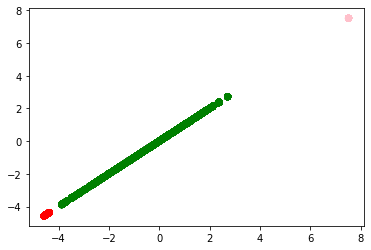

In [13]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue', 'yellow', 'pink']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(train[:,0],train[:,0],  c = dftrain['cluster'].apply(lambda i: colors[ i % len(colors) ]))

plt.show()

## Volviendo al caso de "gomez"

Veamos cómo fue catalogado cada uno de los Gómez.
El usar un sólo componente nos permitió establecer una diferencia muy tajante.
Un apellido o muchos, sin especificar demasiado pequeñas agrupaciones como si los nombres tienen 2 o 3 palabras, si son de apellidos comunes o poco comunes, etc. Sólo 65 elementos no fueron reconocidos.

Como vemos, los Gómez quedaron separados en los dos grupos que queríamos: **aquelles con un solo apellido** y **aquelles con dos**.
Las filas de doble apellido pertenecen al cluster 0, tanto en los casos donde Gómez era el primer apellido (Gómez Alcaraz, Gómez Aguirre) como cuando era el segundo (Gil Gómez, Díaz Gómez).


In [14]:
dfgomez = dftrain[dftrain.funcionario_apellido_nombre.str.contains('gomez')].head(20)
print(dfgomez[['funcionario_apellido_nombre', 'cluster']])


              funcionario_apellido_nombre  cluster
13848            corzo gomez clara isabel        0
14140         criante gomez yesica ivonne        0
16593              diaz gomez arturo leon        0
18765        farias gomez matias federico        0
19255      fernandez gomez rodrigo daniel        0
21621         gallardo gomez felix gaston        0
22204        garcia gomez gonzalo antonio        0
23251             gil gomez maria eugenia        0
23898                 gomez adrian nestor        1
23899  gomez aguirre mauricio maximiliano        0
23900        gomez alamo franco alejandro        0
23901               gomez albano emmanuel        0
23902                 gomez alberto dante        1
23904                  gomez alberto luis        1
23906   gomez alcaraz eric fernando ramon        0
23907                gomez aldana valeria        1
23908                   gomez aldo hernan        1
23909              gomez alejandro carlos        1
23910              gomez alejan

**Finalmente, exportamos los dos grupos por separado, uno para la gente con doble apellido y otro para la gente con uno solo:**

In [15]:
dftrain[dftrain.cluster == 0].to_csv('doble_apellido.csv')
dftrain[dftrain.cluster == 1].to_csv('un_apellido.csv')

Los archivos están disponibles en el notebook con el nombre de `un_apellido.csv` y `doble_apellido.csv`.